<a href="https://colab.research.google.com/github/hardsoft-maker/Theoretical_Mechanics/blob/main/HW7_task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from scipy.integrate import ode
from sympy import Symbol, Point2D, Point3D, Derivative, Function, Eq,cos,sin
from matplotlib.animation import FuncAnimation, PillowWriter
from matplotlib.patches import Polygon, Circle
from scipy.integrate import solve_ivp
from sympy.physics.mechanics import init_vprinting


In [ ]:
init_vprinting()
t = Symbol('t')
x = Function('x')(t)
phi = Function('phi')(t)
g = Symbol('g')
m_c,m_m = Symbol('m_cart'),Symbol('m_mass')
l = Symbol('l')
T = Symbol('T')
J = m_m* l**2
m1=5
m2=1
l=1
g=9.81

In [ ]:
#we describe the equations then we solve them using sympy
Equations = [Eq(m_c*sp.diff(x,t,2), T*sin(phi)),
            Eq(m_m*(-l*sin(phi)*sp.diff(phi,t,1)**2+l*cos(phi)*sp.diff(phi,t,2)+sp.diff(x,t,2)), -T*sin(phi)),
            Eq(-m_m*l*(sin(phi)*sp.diff(phi,t,2) + cos(phi)*sp.diff(phi,t,1)**2), -T*cos(phi)+g*m_m)
            ]
xxx = sp.solve(Equations,[sp.diff(x,t,2),T,sp.diff(phi,t,2)])
sp.classify_ode(Eq(sp.diff(x,t,2),xxx[sp.diff(x,t,2)]), x)
res = sp.dsolve(Eq(sp.diff(x,t,2),xxx[sp.diff(x,t,2)]), x, hint="nth_linear_constant_coeff_variation_of_parameters")

In [ ]:
def plot(time, pos, phi, vel, ang_vel, angle,color):
    # Plotting subplots
    plt.figure(figsize=(12, 6))
    plt.subplot(221)
    plt.plot(time, pos, color)
    plt.xlabel('t (s)')
    plt.ylabel('x (m)')
    plt.title(f'Position x(t) vs Time for {angle}°')
    plt.grid(True)

    plt.subplot(222)
    plt.plot(time, phi, color)
    plt.xlabel('t (s)')
    plt.ylabel('phi (rad)')
    plt.title(f'Angle phi(t) vs Time for {angle}°')
    plt.grid(True)

    plt.subplot(223)
    plt.plot(time, vel, color)
    plt.xlabel('t (s)')
    plt.ylabel('x_dot (m/s)')
    plt.title(f'Velocity x_dot(t) vs Time for {angle}°')
    plt.grid(True)

    plt.subplot(224)
    plt.plot(time, ang_vel, color)
    plt.xlabel('t (s)')
    plt.ylabel('phi_dot (rad/s)')
    plt.title(f'Angular Velocity phi_dot(t) vs Time for {angle}°')
    plt.grid(True)

    plt.tight_layout()
    plt.savefig(f"_{angle}_plot.jpg")
    plt.show()

In [ ]:
# Function defining the equations of motion
def equations(t, y):
    phi, phi_dot, x, x_dot = y

    phi_double_dot = (
        -g * m1 * np.sin(phi) - g * m2 * np.sin(phi) -
        l * m2 * np.sin(phi) * np.cos(phi) * phi_dot**2
    ) / (
        l * (m1 + m2 * (np.sin(phi)**2))
    )
    x_double_dot = (
        g * m2 * np.sin(phi) * np.cos(phi) +
        l * m2 * np.sin(phi)**3 * phi_dot**2 +
        l * m2 * np.sin(phi) * np.cos(phi)**2 * phi_dot**2
    ) / (
        m1 * np.sin(phi)**2 + m1 * np.cos(phi)**2 + m2 * np.sin(phi)**2
    )
    return [phi_dot, phi_double_dot, x_dot, x_double_dot]

In [ ]:

test_angle = 10
phi0 = np.radians(test_angle)
phi_dot0 = 0
x0 = 0
x_dot0 = 0
initial_conditions = [phi0, phi_dot0, x0, x_dot0]
t_span = np.linspace(0, 10, 100)
sol = solve_ivp(equations, [t_span[0], t_span[-1]], initial_conditions, t_eval=t_span)
phi_sol = sol.y[0]
x_sol = sol.y[2]

def update(i):
    cart.set_data([x_sol[i] - 0.5, x_sol[i] + 0.5], [0, 0])
    pole.set_data([x_sol[i], x_sol[i] + np.sin(phi_sol[i]) * l], [0, -np.cos(phi_sol[i]) * l])

fig, ax = plt.subplots()
ax.set_xlim(-2, 2)
ax.set_ylim(-1, 1)
cart, = ax.plot([], [], 'k', lw=2)
pole, = ax.plot([], [], 'b', lw=2)
ani = FuncAnimation(fig, update, frames=len(t_span), interval=10)

plt.gca().set_aspect('equal', adjustable='box')
plt.xlabel('Position')
plt.ylabel('Height')
plt.title(f'animation of {test_angle}°')
plt.grid()
# plt.show()
ani.save(f"simulation_of_{test_angle}_.gif")
plt.close(fig)

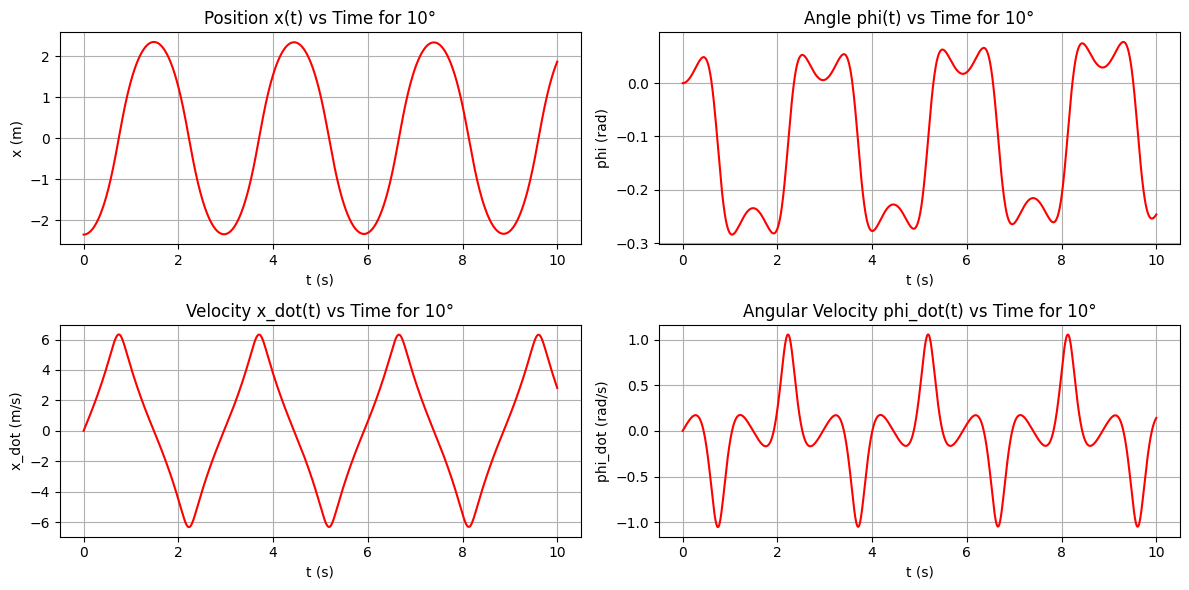

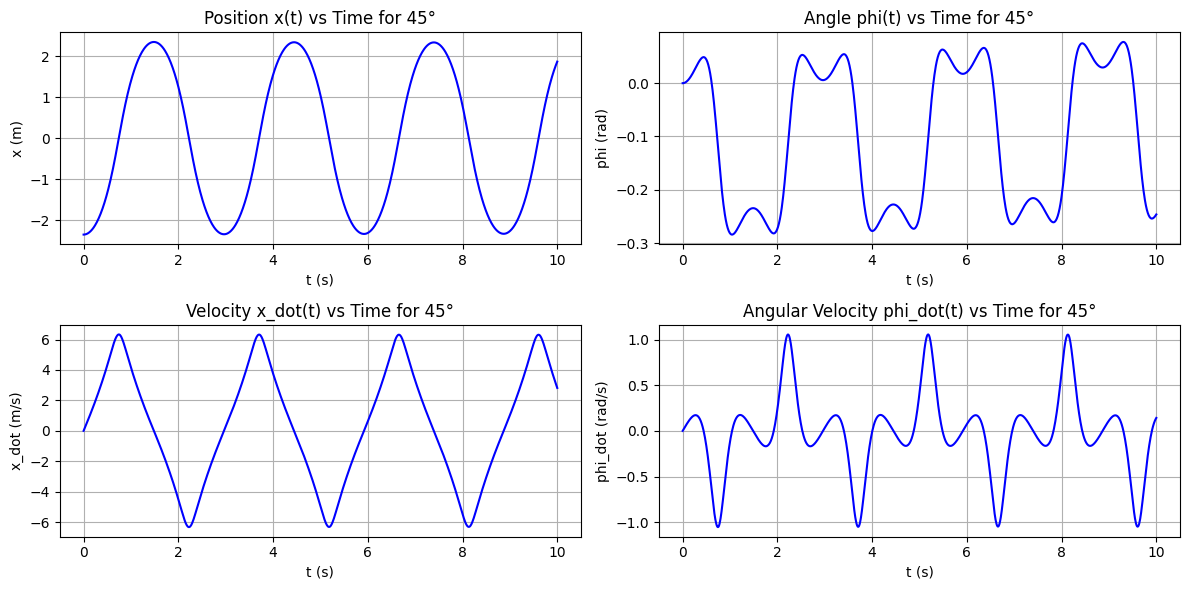

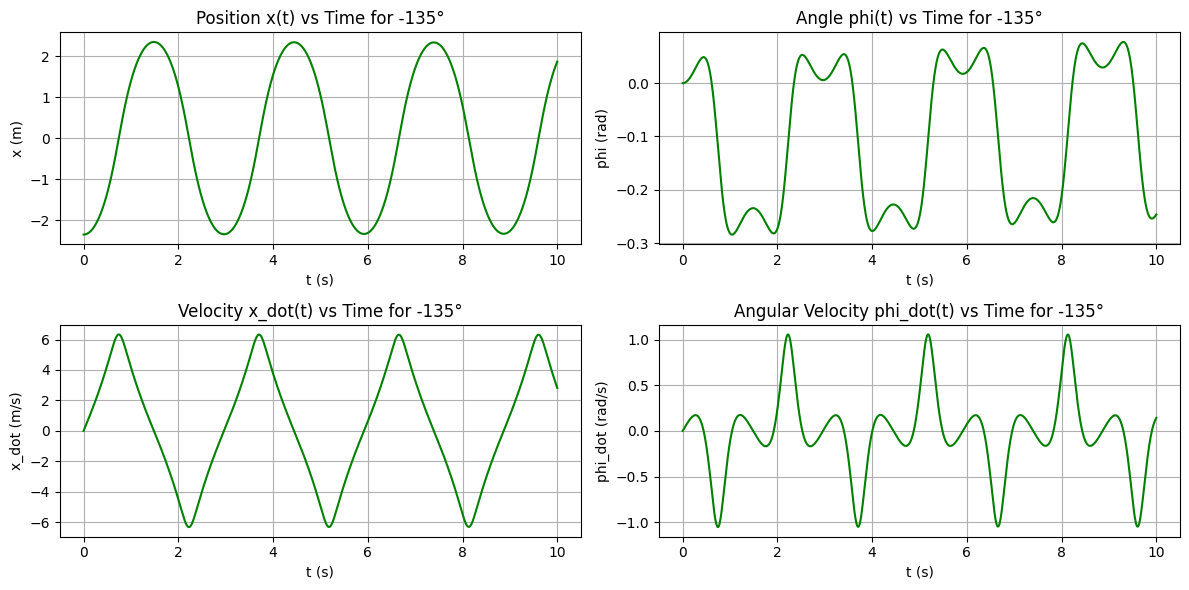

In [ ]:
angles = [10, 45, -135]
colors = ['red', 'blue', 'green']
for a,color in zip(angles,colors):
    t_span = np.linspace(0, 10, 1000)
    sol = solve_ivp(equations, [t_span[0], t_span[-1]], initial_conditions, t_eval=t_span)
    plot(t_span, sol.y[0], sol.y[2], sol.y[1], sol.y[3], a,color=color)